# Microtask 2
Produce a chart showing the distribution of time-to-close (using the corresponding field in the GrimoireLab enriched index for GitHub issues) for issues already closed, and opened during the last six months.

## Repository Under Analysis: AutolabJS/autolabcli
### About the Repository:
A command line interface for AutolabJS, an software we use for code evaluation in my university. I am among the contributors.

In [2]:
from elasticsearch import Elasticsearch
from elasticsearch_dsl import Search

from subprocess import call

import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

## Demonstrations
1. p2o: Last task we did not use p2o, so it is time to use it. Will put up another version of this task using docker with an updated project.json
2. Pandas
3. Matplotlib

## p2o and Connecting to ES
In the previous microtask I used grimoirelab/full to create our ES database. This time, I shall use p2o to accomplish the same.

We shall use subprocess to do so.

Please note that the output has been cleared so that the github token is not displayed.

In [ ]:
subprocess.run(['p2o.py', '--enrich', '--index', 'github_raw', '--index-enrich', 'github',
                '-e', 'http://localhost:9200', '--no_inc', '--debug', 'github', 
              'AutolabJS', 'autolabcli', '-t', 'wubbalubbadubdub', '--sleep-for-rate'])

In [3]:
es = Elasticsearch('http://localhost:9200', verify_certs=False)

In [5]:
es.ping()

True

## Closed Issues
We shall be using the GrimoireLab enriched index 'github'.

It has been mentioned in the task statement to use the time_to_close_days field so we shall be using that.

Open Issues will be dealt separately.



In [6]:
s = Search(using=es, index='github')
s = s.source(['item_type', 'created_at', 'time_to_close_days', 'state'])
s = s.filter('terms', item_type=['issue'])
s = s.filter('range', created_at={'gte':'now-6M'})
s = s.filter('terms', state=['closed'])
s = s.sort({'created_at':{'order':'asc'}})

In [7]:
result = s.execute()

## Parsing result and making our dataframe
We shall now be parsing our result to create a pandas dataframe.
Please note: Appending directly to pd dataframes is expensive and hence will be accomplished using a list

In [8]:
a_list=[]
for item in result:
    a_list.append(item.to_dict())
closed = pd.DataFrame(result_list).round(0)

## Aggregation by number of days

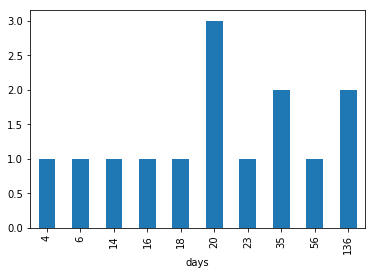

In [10]:
time_closed = closed.groupby([closed.time_to_close_days]).agg('count')
time_closed_plot = time_closed.plot(kind='bar').set_xlabel("days")
plt.show()

## Open Issues
The state field will be changed to open.

Additionally, time_to_close field holds NA value for open issues so we shall make use of time_open_days.

Other than that, our queries shall be similar.

In [11]:
s = Search(using=es, index='github')
s = s.source(['item_type', 'created_at', 'time_open_days', 'state'])
s = s.filter('terms', item_type=['issue'])
s = s.filter('range', created_at={'gte':'now-6M'})
s = s.filter('terms', state=['open'])
s = s.sort({'created_at':{'order':'asc'}})
result = s.execute()

In [14]:
a_list=[]
for item in result:
    a_list.append(item.to_dict())
open_ = pd.DataFrame(result_list).round(0)

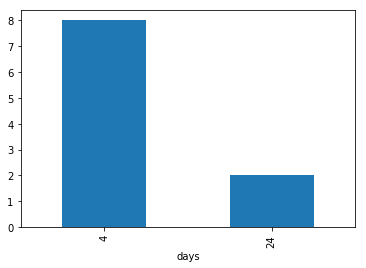

In [16]:
time_open = open_.groupby([open_.time_open_days]).agg('count')
time_open_plot = time_open.plot(kind='bar').set_xlabel("days")
plt.show()

This accomplishes our 2nd task